# Homework 6

In this homework we will
1. Use `sklearn`'s **`SVC`** class to perform non-linear SVM classification 
2. Use `sklearn`'s `cross_val_score` and `GridSearchCV` functions to perform cross validation and hyper-parameter tunning.
3. Reconstruct the classification boundary given  `sklearn`  provide support vectors. 


## Preliminaries

### Imports

<div class="alert alert-block alert-info"> Problem 0 </div>
This time you will need to **add any other necessary  import statements** yourself.

In [198]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.samples as samples

### Random Seed

In [199]:
seed=4543
np.random.seed(seed)

### Sample Data Generation

In [200]:
N=40
X,Y=samples.ellipsoid(N//2)
X_test,Y_test=samples.ellipsoid(N//2)

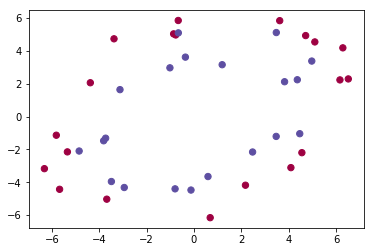

In [201]:
plt.scatter(X[:,0],X[:,1],c=Y, s=40, cmap=plt.cm.Spectral)

## Polinomial features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Greate a function **`phi`**, that, given input $ N\times 2$ array $X$ generates  $N \times 5$ array $Z$
with all monomials in $X$ at to second order, i.e. with the  columns

$$
        X_1, X_2, X_1^2, X_1 X_2, X_2^2
$$


<div class="alert alert-block alert-info"> Problem 1.1 </div>
Generate feature arrays `Z` and `Z_test` with all monomial at to second order for the training data `X` and the test data `X_test` 

((40, 5), (40, 5))

## Linear SVM

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn`'s  function `model_validation.cross_val_score` and `sklearn`'s `svm.SVC` estimator (classifier) compute the average 10-Fold cross validation error of a **linear** svm model fitted to the transformed feature data `Z`.

[HINT] You need to import any `sklearn` modules or functions you want use.

0.90000000000000002

<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit the SVC estimator to the transformed training data `Z`.
After fitting the model, compute the number of support vectors

[HINT] After fitting, Support vectors are stored into the model's variable `support_vectors_`.

Look into [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), specially the **Attributes** section  for information on available results returned by the classifier.

8

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Show that the fitted estimator contains a variable `C` with the value of $C$ it was initialized with 

1.0

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal value of C to use while fitting a  SVC linear model with the transformed training data `Z`.

Display clearly the optimal value of C, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the best estimator $C$ and the array of support vectors.

In [87]:
Cs=[0.001,0.01,0.1,1,10,100,1000,10000]

<div class="alert alert-block alert-info"> Problem 2.4 </div>
Compute the 10-fold cross validation accuracy of the best estimator using `sklearn` `cross_val_score` function

0.94999999999999996

<div class="alert alert-block alert-info"> Problem 2.5 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

<div class="alert alert-block alert-info"> Problem 2.6 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class
[HINT] 
1. Our input classes are y={0,1}, but `SVC` internally treats them as if they were y=(-1,1)
2. The fitted estimator contains an array **`dual_coef_`** that contains the values of $\alpha_i y_i$
3. `dual_coef_` is a $1 x N$ array, it may be easier for the rest of this notebook to turn in into a $N$ array by using
    `ravel()` method.


array([-0.0745366 , -0.03340815, -0.1       , -0.09613701, -0.02785635,
        0.03193811,  0.1       ,  0.1       ,  0.1       ])

<div class="alert alert-block alert-info"> Problem 2.7 </div>
Show wich support vectors are in violation of the margin

[HINT]
Remember that support vectors in violation of the marging satisfy
$$
    \alpha_i = C
$$
But that `SVC` returned 

$$
    \textrm{dual_coef}_i = \alpha_i y_i
$$

[False False  True False False False  True  True  True]


<div class="alert alert-block alert-info"> Problem 2.8 </div>
Using equation
$$
    w_d = \sum_i \alpha_i y_i x_{i,d}
$$
compute the vector of loadings $w$

<div class="alert alert-block alert-info"> Problem 2.9 </div>
Select a support vector not in violation of the margin and use the equation

$$
    y_i(w^T x + b) =1
$$
to compute $b$

array([  4.71747825,   4.93114745,  22.25460101,  23.26258084,  24.3162152 ])

<div class="alert alert-block alert-info"> Problem 2.10 </div>
Write a prediction function that classifies poinst as having class $y=0$ or $y=1$ in terms of $w$ and $b$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

## Polinomial Kernel

<div class="alert alert-block alert-info"> Problem 3.1 </div>
using sklearn's function model_validation.cross_val_score and sklearn's svm.SVC estimator (classifier) compute the average 10-Fold cross validation error of a linear svm model to the **polinomial** kernel and the **untransformed** training data $X$,$Y.

Set the polinomial kernel to be
$$
    K(x,x') = (1 + x^T x')^2
$$

[HINT] 
1. `SVC` implement the following parametrization of the polynomial kernel
$$
    K(x,x') = ( c + \gamma x^T x')^d
$$
where $c$ is the parameter `coef0` of `SVC`'s constructor and $\gamma$ is the `gamma` parameter, and $d$ is the `degree` parameter.

2. You may want to review again the [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal values of $C$ and $\gamma$ to use while fitting a  SVC polynomial kernel with the untransformed training data `X`. Keep the constant $c$ (`coef0`) fixed at 1.

Display clearly the optimal values of $C$ and $\gamma$, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ and $\gamma$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the values of best estimator's $C$  and $\gamma$ parameters and the array of support vectors.
6. As the search may be a bit time consuming, it may be useful so set the `GridSearchCV` verbose parameter so that you can see if the search is making progress.

In [168]:
Cs=[0.001,0.01,0.1,1,10,100]
gammas=[0.01,0.1,1,10,100]

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class


(40,)

<div class="alert alert-block alert-info"> Problem 3.5 </div>
Show which support vectors are in violation of the margin


<div class="alert alert-block alert-info"> Problem 3.6 </div>
Write a function that, give two matrices $X_{i,d}$, $X'_{j,d}$ for $i=1,\dots,N_1$, $j=1,\dots,N_2$ and $d=1,\dots D$
computes the kernel products
$$
    K_{i,j} = \textrm{kernel}(X_i,X'_j)
$$
where 'kernel' is the optimal kernel you found by cross-validation

0.97499999999999998

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Write a prediction function that classifies points as having class $y=0$ or $y=1$ in terms of $\alpha$, $b$, and the support vectors, using equation

$$
  y(x) =  \frac{\textrm{sign}( \sum_i \alpha_i y_i K(x,x_i) + b ) + 1}{2}
$$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

0.875

<div class="alert alert-block alert-info"> Problem 3.8 </div>
Use the function `decision_boundary_2d` from the python module `E4525_ML.plots` to display a graph of the training points and 
the optimal estimator descision boundary.

0.75